In [6]:
#train on 232 routs with 500 epochs(for all the points with delay and in_time)

In [7]:
import time
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
from datetime import datetime
import numpy as np
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(edgeitems=2, linewidth=75)
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [8]:
file = "mta_1706_full.csv"
target_file = os.getcwd() + f"/{file}"

In [9]:
#df2 = pd.read_csv('mta_1706_full.csv', on_bad_lines='skip')
df2 = pd.read_csv('mta_1706_full.csv', error_bad_lines=False)
df2

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,23:59:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12
6730432,2017-06-30 23:53:13,1,M79-SBS,E 79 ST/EAST END AV,40.770741,-73.948715,SELECT BUS W SIDE RIVERSIDE DR CROSSTOWN,40.784988,-73.982460,NYCT_5927,40.770681,-73.948759,E 79 ST/EAST END AV,at stop,0.0,NaN,24:02:00
6730433,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.848522,-73.937706,31 ST 6 AV,40.747791,-73.988831,NYCT_6388,40.820420,-73.955842,W 135 ST/RIVERSIDE DR,approaching,120.0,2017-06-30 23:54:27,23:44:16
6730434,2017-06-30 23:53:34,0,M4,W 32 ST/7 AV,40.749405,-73.991020,WASH HTS CABRINI BLV via MADSON via BWAY,40.859013,-73.934250,NYCT_6392,40.797009,-73.948954,CENTRAL PK N/5 AV,at stop,22.0,2017-06-30 23:53:42,23:50:00


In [10]:
## Check the number of columns in each row and keep only rows with 17 columns
# # df_cleaned = df[df.apply(lambda row: row.count() == 17, axis=1)]
# df_cleaned.to_csv(output_file, index=False)

In [11]:

df2.dropna(axis = 0, how = 'any', subset = None, inplace = True)
df2

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,23:59:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12
6730433,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.848522,-73.937706,31 ST 6 AV,40.747791,-73.988831,NYCT_6388,40.820420,-73.955842,W 135 ST/RIVERSIDE DR,approaching,120.0,2017-06-30 23:54:27,23:44:16
6730434,2017-06-30 23:53:34,0,M4,W 32 ST/7 AV,40.749405,-73.991020,WASH HTS CABRINI BLV via MADSON via BWAY,40.859013,-73.934250,NYCT_6392,40.797009,-73.948954,CENTRAL PK N/5 AV,at stop,22.0,2017-06-30 23:53:42,23:50:00


In [ ]:
number = df2.ArrivalProximityText.unique().size
print("number_of_statuses : "+ str(number))

number_of_statuses : 209


In [12]:
df2 = df2[df2["ArrivalProximityText"].str.contains("at stop") == False]
df2

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12
6730433,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.848522,-73.937706,31 ST 6 AV,40.747791,-73.988831,NYCT_6388,40.820420,-73.955842,W 135 ST/RIVERSIDE DR,approaching,120.0,2017-06-30 23:54:27,23:44:16


In [13]:
number = df2.ArrivalProximityText.unique().size
print("number_of_statuses : "+ str(number))

number_of_statuses : 208


In [14]:
number = df2.PublishedLineName.unique().size
print("number_of_lines : "+ str(number))

number_of_lines : 236


In [15]:
df=df2[df2['DirectionRef']==0]
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,40.675349,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12


In [ ]:
#df.to_csv(r'C:\Users\full_edited_dataset.csv', index=False)

In [ ]:
#df=df2[df2['PublishedLineName'].str.contains("B82")]
#df


In [16]:
number = df.PublishedLineName.unique().size
print("number_of_lines : "+ str(number))

number_of_lines : 232


In [17]:
number = df.VehicleRef.unique().size
print("number_of_tracked_vehicles : "+ str(number))

number_of_tracked_vehicles : 4468


In [18]:
number = df.DestinationName.unique().size
print("number_of_destination : "+ str(number))

number_of_destination : 312


In [19]:
number = df.OriginName.unique().size
print("number_of_origins : "+ str(number))

number_of_origins : 310


In [20]:
number = df.NextStopPointName.unique().size
print("number_of_total_stops : "+ str(number))

number_of_total_stops : 6229


In [ ]:
#df3= df2[df2['VehicleRef']=="NYCT_3805"]
#df3

In [ ]:
#df3.to_csv('data_one_bus.csv')

In [22]:
df['line']=df.PublishedLineName.factorize()[0]+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df['bus_stop']=df.NextStopPointName.factorize()[0]+1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,3
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,4
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,40.675349,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,40,1205
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,148,985
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,19,3622
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,90,479


In [25]:
df[['date','expected_arrival_time']] = df.ExpectedArrivalTime.str.split(expand=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop,date,expected_arrival_time
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,1,2017-06-01,00:03:59
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2,2017-06-01,00:04:03
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,3,2017-06-01,00:03:56
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,4,2017-06-01,00:04:13
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,5,2017-06-01,00:03:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,40,1205,2017-06-30,23:53:49
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,148,985,2017-06-30,23:53:39
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,19,3622,2017-06-30,23:54:13
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,90,479,2017-06-30,23:53:52


In [26]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop,date,expected_arrival_time,day_of_week
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,1,2017-06-01,00:03:59,Thursday
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2,2017-06-01,00:04:03,Thursday
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,3,2017-06-01,00:03:56,Thursday
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,4,2017-06-01,00:04:13,Thursday
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,5,2017-06-01,00:03:56,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,40,1205,2017-06-30,23:53:49,Friday
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,148,985,2017-06-30,23:53:39,Friday
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,19,3622,2017-06-30,23:54:13,Friday
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,90,479,2017-06-30,23:53:52,Friday


In [27]:
df.loc[df['day_of_week'] == 'Monday', 'day_type'] = 'Workday'
df.loc[df['day_of_week'] == 'Tuesday', 'day_type'] = 'Workday'
df.loc[df['day_of_week'] == 'Wednesday', 'day_type'] = 'Workday'
df.loc[df['day_of_week'] == 'Thursday', 'day_type'] = 'Workday'
df.loc[df['day_of_week'] == 'Friday', 'day_type'] = 'Workday'
df.loc[df['day_of_week'] == 'Saturday', 'day_type'] = 'Weekend'
df.loc[df['day_of_week'] == 'Sunday', 'day_type'] = 'Weekend'
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop,date,expected_arrival_time,day_of_week,day_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,1,2017-06-01,00:03:59,Thursday,Workday
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2,2017-06-01,00:04:03,Thursday,Workday
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,3,2017-06-01,00:03:56,Thursday,Workday
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,4,2017-06-01,00:04:13,Thursday,Workday
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,5,2017-06-01,00:03:56,Thursday,Workday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,approaching,85.0,2017-06-30 23:53:49,23:30:18,40,1205,2017-06-30,23:53:49,Friday,Workday
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,approaching,44.0,2017-06-30 23:53:39,23:47:00,148,985,2017-06-30,23:53:39,Friday,Workday
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,approaching,123.0,2017-06-30 23:54:13,24:09:34,19,3622,2017-06-30,23:54:13,Friday,Workday
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,approaching,47.0,2017-06-30 23:53:52,23:44:12,90,479,2017-06-30,23:53:52,Friday,Workday


In [28]:
df['day_type']=df.day_type.factorize()[0]+1
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop,date,expected_arrival_time,day_of_week,day_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,1,2017-06-01,00:03:59,Thursday,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2,2017-06-01,00:04:03,Thursday,1
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,3,2017-06-01,00:03:56,Thursday,1
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,4,2017-06-01,00:04:13,Thursday,1
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,5,2017-06-01,00:03:56,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,approaching,85.0,2017-06-30 23:53:49,23:30:18,40,1205,2017-06-30,23:53:49,Friday,1
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,approaching,44.0,2017-06-30 23:53:39,23:47:00,148,985,2017-06-30,23:53:39,Friday,1
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,approaching,123.0,2017-06-30 23:54:13,24:09:34,19,3622,2017-06-30,23:54:13,Friday,1
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,approaching,47.0,2017-06-30 23:53:52,23:44:12,90,479,2017-06-30,23:53:52,Friday,1


In [29]:
number = df.day_type.unique().size
print("number : "+ str(number))

number : 2


In [30]:
number = df.VehicleRef.unique().size
print("number_of_Vehicle_references : "+ str(number))

number_of_Vehicle_references : 4468


In [31]:
df['Vehicle_type']=df.VehicleRef.factorize()[0]+1
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,line,bus_stop,date,expected_arrival_time,day_of_week,day_type,Vehicle_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,76.0,2017-06-01 00:03:59,24:06:14,1,1,2017-06-01,00:03:59,Thursday,1,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,267.0,2017-06-01 00:04:03,24:03:00,2,2,2017-06-01,00:04:03,Thursday,1,2
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,73.0,2017-06-01 00:03:56,24:02:35,3,3,2017-06-01,00:03:56,Thursday,1,3
7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,196.0,2017-06-01 00:04:13,23:58:47,4,4,2017-06-01,00:04:13,Thursday,1,4
8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,35.0,2017-06-01 00:03:56,24:00:00,5,5,2017-06-01,00:03:56,Thursday,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730428,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,85.0,2017-06-30 23:53:49,23:30:18,40,1205,2017-06-30,23:53:49,Friday,1,3296
6730429,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,44.0,2017-06-30 23:53:39,23:47:00,148,985,2017-06-30,23:53:39,Friday,1,3699
6730430,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,123.0,2017-06-30 23:54:13,24:09:34,19,3622,2017-06-30,23:54:13,Friday,1,4363
6730431,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,47.0,2017-06-30 23:53:52,23:44:12,90,479,2017-06-30,23:53:52,Friday,1,2178


In [32]:
print(df.dtypes)

RecordedAtTime                       object
DirectionRef                          int64
PublishedLineName                    object
OriginName                           object
OriginLat                           float64
OriginLong                          float64
DestinationName                      object
DestinationLat                      float64
DestinationLong                     float64
VehicleRef                           object
VehicleLocation.Latitude            float64
VehicleLocation.Longitude           float64
NextStopPointName                    object
ArrivalProximityText                 object
DistanceFromStop                    float64
ExpectedArrivalTime                  object
ScheduledArrivalTime                 object
line                                  int64
bus_stop                              int64
date                         datetime64[ns]
expected_arrival_time                object
day_of_week                          object
day_type                        

In [33]:
num_vars=['Vehicle_type','line','bus_stop', 'DistanceFromStop','RecordedAtTime', 'ExpectedArrivalTime',
          'ScheduledArrivalTime','day_type']


In [34]:
df=df[num_vars]
df

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
0,1,1,1,76.0,2017-06-01 00:03:34,2017-06-01 00:03:59,24:06:14,1
3,2,2,2,267.0,2017-06-01 00:03:31,2017-06-01 00:04:03,24:03:00,1
5,3,3,3,73.0,2017-06-01 00:03:40,2017-06-01 00:03:56,24:02:35,1
7,4,4,4,196.0,2017-06-01 00:03:29,2017-06-01 00:04:13,23:58:47,1
8,5,5,5,35.0,2017-06-01 00:03:27,2017-06-01 00:03:56,24:00:00,1
...,...,...,...,...,...,...,...,...
6730428,3296,40,1205,85.0,2017-06-30 23:53:24,2017-06-30 23:53:49,23:30:18,1
6730429,3699,148,985,44.0,2017-06-30 23:53:12,2017-06-30 23:53:39,23:47:00,1
6730430,4363,19,3622,123.0,2017-06-30 23:53:20,2017-06-30 23:54:13,24:09:34,1
6730431,2178,90,479,47.0,2017-06-30 23:53:37,2017-06-30 23:53:52,23:44:12,1


In [35]:
#df.to_csv('data_time.csv')

In [36]:
print(df.dtypes)

Vehicle_type              int64
line                      int64
bus_stop                  int64
DistanceFromStop        float64
RecordedAtTime           object
ExpectedArrivalTime      object
ScheduledArrivalTime     object
day_type                  int64
dtype: object


In [37]:
print(df['RecordedAtTime'])
print(df['ExpectedArrivalTime'])
print(df['ScheduledArrivalTime'])

0          2017-06-01 00:03:34
3          2017-06-01 00:03:31
5          2017-06-01 00:03:40
7          2017-06-01 00:03:29
8          2017-06-01 00:03:27
                  ...         
6730428    2017-06-30 23:53:24
6730429    2017-06-30 23:53:12
6730430    2017-06-30 23:53:20
6730431    2017-06-30 23:53:37
6730435    2017-06-30 23:53:18
Name: RecordedAtTime, Length: 2177992, dtype: object
0          2017-06-01 00:03:59
3          2017-06-01 00:04:03
5          2017-06-01 00:03:56
7          2017-06-01 00:04:13
8          2017-06-01 00:03:56
                  ...         
6730428    2017-06-30 23:53:49
6730429    2017-06-30 23:53:39
6730430    2017-06-30 23:54:13
6730431    2017-06-30 23:53:52
6730435    2017-06-30 23:53:39
Name: ExpectedArrivalTime, Length: 2177992, dtype: object
0          24:06:14
3          24:03:00
5          24:02:35
7          23:58:47
8          24:00:00
             ...   
6730428    23:30:18
6730429    23:47:00
6730430    24:09:34
6730431    23:44:12
6730435

In [38]:
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'], errors = 'coerce')
tindex = pd.DatetimeIndex(df.RecordedAtTime)
df['RecordedAtTime'] = tindex.strftime('%H:%M:%S')
df['RecordedAtTime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          00:03:34
3          00:03:31
5          00:03:40
7          00:03:29
8          00:03:27
             ...   
6730428    23:53:24
6730429    23:53:12
6730430    23:53:20
6730431    23:53:37
6730435    23:53:18
Name: RecordedAtTime, Length: 2177992, dtype: object

In [39]:
df['RecordedAtTime'] = pd.to_timedelta(df['RecordedAtTime']).dt.total_seconds()
df['RecordedAtTime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0            214.0
3            211.0
5            220.0
7            209.0
8            207.0
            ...   
6730428    86004.0
6730429    85992.0
6730430    86000.0
6730431    86017.0
6730435    85998.0
Name: RecordedAtTime, Length: 2177992, dtype: float64

In [40]:
df['ExpectedArrivalTime'] = pd.to_datetime(df['ExpectedArrivalTime'], errors = 'coerce')
tindex2 = pd.DatetimeIndex(df.ExpectedArrivalTime)
df['ExpectedArrivalTime'] = tindex2.strftime('%H:%M:%S')
df['ExpectedArrivalTime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          00:03:59
3          00:04:03
5          00:03:56
7          00:04:13
8          00:03:56
             ...   
6730428    23:53:49
6730429    23:53:39
6730430    23:54:13
6730431    23:53:52
6730435    23:53:39
Name: ExpectedArrivalTime, Length: 2177992, dtype: object

In [41]:
df['ExpectedArrivalTime'] = pd.to_timedelta(df['ExpectedArrivalTime']).dt.total_seconds()
df['ExpectedArrivalTime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0            239.0
3            243.0
5            236.0
7            253.0
8            236.0
            ...   
6730428    86029.0
6730429    86019.0
6730430    86053.0
6730431    86032.0
6730435    86019.0
Name: ExpectedArrivalTime, Length: 2177992, dtype: float64

In [42]:
df['ScheduledArrivalTime'] = pd.to_datetime(df['ScheduledArrivalTime'], errors = 'coerce')
tindex3 = pd.DatetimeIndex(df.ScheduledArrivalTime)
df['ScheduledArrivalTime'] = tindex3.strftime('%H:%M:%S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
df['ScheduledArrivalTime'] = pd.to_timedelta(df['ScheduledArrivalTime']).dt.total_seconds()
df['ScheduledArrivalTime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0              NaN
3              NaN
5              NaN
7          86327.0
8              NaN
            ...   
6730428    84618.0
6730429    85620.0
6730430        NaN
6730431    85452.0
6730435    85515.0
Name: ScheduledArrivalTime, Length: 2177992, dtype: float64

In [44]:
df

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
0,1,1,1,76.0,214.0,239.0,NaN,1
3,2,2,2,267.0,211.0,243.0,NaN,1
5,3,3,3,73.0,220.0,236.0,NaN,1
7,4,4,4,196.0,209.0,253.0,86327.0,1
8,5,5,5,35.0,207.0,236.0,NaN,1
...,...,...,...,...,...,...,...,...
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1
6730430,4363,19,3622,123.0,86000.0,86053.0,NaN,1
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1


In [45]:
df.dropna(axis = 0, how = 'any', subset = None, inplace = True)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
7,4,4,4,196.0,209.0,253.0,86327.0,1
10,6,6,6,207.0,228.0,269.0,85715.0,1
46,17,16,17,206.0,217.0,280.0,86126.0,1
58,19,18,10,244.0,232.0,383.0,85920.0,1
60,20,6,19,102.0,219.0,241.0,85920.0,1
...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1


In [46]:
df['delay']=df['ExpectedArrivalTime'] - df['ScheduledArrivalTime']
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay
7,4,4,4,196.0,209.0,253.0,86327.0,1,-86074.0
10,6,6,6,207.0,228.0,269.0,85715.0,1,-85446.0
46,17,16,17,206.0,217.0,280.0,86126.0,1,-85846.0
58,19,18,10,244.0,232.0,383.0,85920.0,1,-85537.0
60,20,6,19,102.0,219.0,241.0,85920.0,1,-85679.0
...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0


In [47]:
df['daley_status'] = np.where(df['delay']> 0, True, False)
df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status
7,4,4,4,196.0,209.0,253.0,86327.0,1,-86074.0,False
10,6,6,6,207.0,228.0,269.0,85715.0,1,-85446.0,False
46,17,16,17,206.0,217.0,280.0,86126.0,1,-85846.0,False
58,19,18,10,244.0,232.0,383.0,85920.0,1,-85537.0,False
60,20,6,19,102.0,219.0,241.0,85920.0,1,-85679.0,False
...,...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0,True
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0,True
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0,True
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0,True


In [48]:
df= df[df['delay']>0]
df

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status
979,252,144,285,250.0,808.0,850.0,641.0,1,209.0,True
1245,296,69,367,98.0,817.0,838.0,666.0,1,172.0,True
1475,327,137,422,219.0,1425.0,1454.0,1403.0,1,51.0,True
1578,337,132,452,278.0,1423.0,1476.0,1351.0,1,125.0,True
1739,349,84,494,61.0,1410.0,1437.0,1407.0,1,30.0,True
...,...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0,True
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0,True
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0,True
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0,True


In [49]:
conditions = [
    (df['RecordedAtTime'] > 21600) & (df['RecordedAtTime'] <= 36000),
    (df['RecordedAtTime'] > 54000) & (df['RecordedAtTime'] <= 68400)
    ]
values = ['yes', 'yes']
df.loc[:,'rush_hour'] = np.select(conditions, values, default='no')
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status,rush_hour
979,252,144,285,250.0,808.0,850.0,641.0,1,209.0,True,no
1245,296,69,367,98.0,817.0,838.0,666.0,1,172.0,True,no
1475,327,137,422,219.0,1425.0,1454.0,1403.0,1,51.0,True,no
1578,337,132,452,278.0,1423.0,1476.0,1351.0,1,125.0,True,no
1739,349,84,494,61.0,1410.0,1437.0,1407.0,1,30.0,True,no


In [50]:
df['rush_hour_status']=df.rush_hour.factorize()[0]+1
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status,rush_hour,rush_hour_status
979,252,144,285,250.0,808.0,850.0,641.0,1,209.0,True,no,1
1245,296,69,367,98.0,817.0,838.0,666.0,1,172.0,True,no,1
1475,327,137,422,219.0,1425.0,1454.0,1403.0,1,51.0,True,no,1
1578,337,132,452,278.0,1423.0,1476.0,1351.0,1,125.0,True,no,1
1739,349,84,494,61.0,1410.0,1437.0,1407.0,1,30.0,True,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0,True,no,1
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0,True,no,1
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0,True,no,1
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0,True,no,1


In [51]:
number = df.rush_hour_status.unique().size
print("number_of_status : "+ str(number))

number_of_status : 2


In [52]:
df['trip_time']=df['ExpectedArrivalTime'] - df['RecordedAtTime']
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status,rush_hour,rush_hour_status,trip_time
979,252,144,285,250.0,808.0,850.0,641.0,1,209.0,True,no,1,42.0
1245,296,69,367,98.0,817.0,838.0,666.0,1,172.0,True,no,1,21.0
1475,327,137,422,219.0,1425.0,1454.0,1403.0,1,51.0,True,no,1,29.0
1578,337,132,452,278.0,1423.0,1476.0,1351.0,1,125.0,True,no,1,53.0
1739,349,84,494,61.0,1410.0,1437.0,1407.0,1,30.0,True,no,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0,True,no,1,31.0
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0,True,no,1,25.0
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0,True,no,1,27.0
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0,True,no,1,15.0


In [53]:
print(df.dtypes)

Vehicle_type              int64
line                      int64
bus_stop                  int64
DistanceFromStop        float64
RecordedAtTime          float64
ExpectedArrivalTime     float64
ScheduledArrivalTime    float64
day_type                  int64
delay                   float64
daley_status               bool
rush_hour                object
rush_hour_status          int64
trip_time               float64
dtype: object


In [54]:
df['DistanceFromStop'] = df['DistanceFromStop'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
conditions = [
    (df['DistanceFromStop'] > 250),
    (df['DistanceFromStop'] <= 250)
    ]
values = [1, 0]
df['far'] = np.select(conditions, values)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,delay,daley_status,rush_hour,rush_hour_status,trip_time,far
979,252,144,285,250.0,808.0,850.0,641.0,1,209.0,True,no,1,42.0,0
1245,296,69,367,98.0,817.0,838.0,666.0,1,172.0,True,no,1,21.0,0
1475,327,137,422,219.0,1425.0,1454.0,1403.0,1,51.0,True,no,1,29.0,0
1578,337,132,452,278.0,1423.0,1476.0,1351.0,1,125.0,True,no,1,53.0,1
1739,349,84,494,61.0,1410.0,1437.0,1407.0,1,30.0,True,no,1,27.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730426,525,29,390,143.0,85988.0,86019.0,84616.0,1,1403.0,True,no,1,31.0,0
6730428,3296,40,1205,85.0,86004.0,86029.0,84618.0,1,1411.0,True,no,1,25.0,0
6730429,3699,148,985,44.0,85992.0,86019.0,85620.0,1,399.0,True,no,1,27.0,0
6730431,2178,90,479,47.0,86017.0,86032.0,85452.0,1,580.0,True,no,1,15.0,0


In [56]:
num_vars=['line','Vehicle_type',
          'delay','rush_hour_status','day_type','bus_stop',
          'DistanceFromStop','far', 'trip_time']
df=df[num_vars]
df

,line,Vehicle_type,delay,rush_hour_status,day_type,bus_stop,DistanceFromStop,far,trip_time
979,144,252,209.0,1,1,285,250.0,0,42.0
1245,69,296,172.0,1,1,367,98.0,0,21.0
1475,137,327,51.0,1,1,422,219.0,0,29.0
1578,132,337,125.0,1,1,452,278.0,1,53.0
1739,84,349,30.0,1,1,494,61.0,0,27.0
...,...,...,...,...,...,...,...,...,...
6730426,29,525,1403.0,1,1,390,143.0,0,31.0
6730428,40,3296,1411.0,1,1,1205,85.0,0,25.0
6730429,148,3699,399.0,1,1,985,44.0,0,27.0
6730431,90,2178,580.0,1,1,479,47.0,0,15.0


In [57]:
#modified code fro github
num_vars=[
          'line','trip_time','rush_hour_status','day_type','bus_stop',
          'DistanceFromStop','far']
df=df[num_vars]
df

,line,trip_time,rush_hour_status,day_type,bus_stop,DistanceFromStop,far
979,144,42.0,1,1,285,250.0,0
1245,69,21.0,1,1,367,98.0,0
1475,137,29.0,1,1,422,219.0,0
1578,132,53.0,1,1,452,278.0,1
1739,84,27.0,1,1,494,61.0,0
...,...,...,...,...,...,...,...
6730426,29,31.0,1,1,390,143.0,0
6730428,40,25.0,1,1,1205,85.0,0
6730429,148,27.0,1,1,985,44.0,0
6730431,90,15.0,1,1,479,47.0,0


In [ ]:
# from copy import deepcopy as dc

# def prepare_dataframe_for_lstm(df, n_steps):
#     df = dc(df)

#     df.set_index('bus_stop', inplace=True)

#     for i in range(1, n_steps+1):
#         df[f'delay(t-{i})'] = df['delay'].shift(i)

#     df.dropna(inplace=True)

#     return df

# lookback = 5
# shifted_df = prepare_dataframe_for_lstm(df, lookback)
# shifted_df

In [58]:
#One-Hot encoding (for multiple lines)
df3 = pd.get_dummies(df.line , dummy_na=False)
#df
#list(df5.columns)
df3
#df
#df.to_excel(r'C:\Users\nrashvan\8.xlsx', index=False)

,1,2,3,4,5,6,7,8,9,10,...,223,224,225,226,227,228,229,230,231,232
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df1 = pd.concat([df.iloc[:,0:], df3.iloc[:, 0:]], axis=1)
df1



,line,trip_time,rush_hour_status,day_type,bus_stop,DistanceFromStop,far,1,2,3,...,223,224,225,226,227,228,229,230,231,232
979,144,42.0,1,1,285,250.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,69,21.0,1,1,367,98.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,137,29.0,1,1,422,219.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,132,53.0,1,1,452,278.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,84,27.0,1,1,494,61.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730426,29,31.0,1,1,390,143.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730428,40,25.0,1,1,1205,85.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730429,148,27.0,1,1,985,44.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730431,90,15.0,1,1,479,47.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# X = df1.iloc[:, 7:244].values
# Y = df1.iloc[:, 6].values
X = df1.iloc[:, 2:239].values
Y = df1.iloc[:, 1].values
Y

array([42., 21., 29., ..., 27., 15., 21.])

In [62]:
X[0]

array([  1.,   1., 285., 250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   

In [63]:
Y.shape

(1566247,)

In [64]:
X.shape

(1566247, 237)

In [65]:

scaler =MinMaxScaler()
X= scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.04560051, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05876686, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06759794, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.15799615, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07675016, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10388568, ..., 0.        , 0.        ,
        0.        ]])

In [66]:
import torch
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape

torch.Size([1566247, 237])

In [67]:
Y.shape

torch.Size([1566247])

In [68]:
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_X = X[train_indices]
train_Y = Y[train_indices]
train_Y = train_Y.unsqueeze(1)

val_X = X[val_indices]
val_Y = Y[val_indices]
val_Y = val_Y.unsqueeze(1)

In [69]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

torch.Size([1252998, 237])
torch.Size([1252998, 1])
torch.Size([313249, 237])
torch.Size([313249, 1])


In [70]:
train_X = train_X.float()
train_Y = train_Y.float()
val_X = val_X.float()
val_Y = val_Y.float()
print(train_X.dtype)
print(train_Y.dtype)
print(val_X.dtype)
print(val_Y.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [71]:
model = nn.Sequential(
            nn.Linear(237, 320),
            nn.ReLU(),
            nn.Linear(320, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 40),
            nn.ReLU(),
            nn.Linear(40, 5),
            nn.ReLU(),
            nn.Linear(5, 1))

model

Sequential(
  (0): Linear(in_features=237, out_features=320, bias=True)
  (1): ReLU()
  (2): Linear(in_features=320, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=40, bias=True)
  (7): ReLU()
  (8): Linear(in_features=40, out_features=5, bias=True)
  (9): ReLU()
  (10): Linear(in_features=5, out_features=1, bias=True)
)

In [72]:
df_validation= pd.DataFrame(columns=["Line", "RMSE"])

In [73]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [84]:
def custom_val(loaded_model_1, test_X, test_Y, device):
  d=[]
  #T = torch.cat((test_X,test_Y),1)
  T = torch.cat((test_X, test_Y), 1).to(device)
  loss_fn = nn.MSELoss()
  loaded_model_1.eval()
  print(test_X.shape[0])
  for jj in range(1,233):
      b = (T[:,jj+4]== 1)
      indices = b.nonzero().squeeze(1)
      line = T[indices ]
      val_x_line= line[:, 0:237]
      print(val_x_line.shape[0])
      val_y_line=line[:, 237]
      #print(val_x_line.shape[0])
    #   with torch.inference_mode():
      with torch.no_grad():
          loaded_model_preds = loaded_model_1(val_x_line)
          print(loaded_model_preds.shape)
          val_y_line = val_y_line.unsqueeze(1)
          print(val_y_line.shape)
          test_loss = loss_fn(loaded_model_preds, val_y_line)
          print(f"Test loss_ line{jj}: {test_loss:.5f}")
          RMSE= torch.sqrt(test_loss)
          d.append((jj, RMSE))
          #df3.append((jj, RMSE))
          print(f"RMSE_line{jj}: {RMSE:.5f}")
          df3.loc[len(df3)] = [jj,RMSE]
  return d
final_error=[]

def training_loop(n_epochs, optimizer, model, loss_fn, train_X, val_X, train_Y, val_Y):

    train_losses = np.zeros(n_epochs+1)
    val_losses = np.zeros(n_epochs+1)
    start=time.time()
    for epoch in range(1, n_epochs + 1):
        # model.train()
        # train_t_p = model(train_X)
        # train_loss = loss_fn(train_t_p, train_Y)
        # train_losses[epoch] = train_loss
        # RMSE_train=math.sqrt(train_loss)


        # val_t_p = model(val_X)
        # val_loss = loss_fn(val_t_p, val_Y)
        # val_losses[epoch] = val_loss
        # RMSE_validation=math.sqrt(val_loss)


        train_t_p = model(train_X.to(device))
        train_loss = loss_fn(train_t_p, train_Y.to(device))
        train_losses[epoch] = train_loss.to(device)
        RMSE_train = math.sqrt(train_loss)

        val_t_p = model(val_X.to(device))
        val_loss = loss_fn(val_t_p, val_Y.to(device))
        val_losses[epoch] = val_loss
        RMSE_validation = math.sqrt(val_loss)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch ==1 or epoch % 30==0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            print("RMSE_train:", RMSE_train)
            print("RMSE_validation:", RMSE_validation)
            final_error=custom_val(model.eval(), val_X, val_Y, device)

    stop=time.time()
    plt.plot(train_losses, color = 'blue')
    plt.plot(val_losses, color = 'red')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.legend(['train_losses', 'val_losses'])
    plt.grid()
    plt.xlabel('number of Epochs')
    plt.ylabel('loss (J)')
    plt.title('Convergence of Loss')
    print(f"Training Time: {stop - start} s")

IndentationError: unexpected indent (<ipython-input-84-d0657d424d26>, line 17)

In [82]:
model.to(device)
optimizer= optim.Adam(model.parameters(), lr=1e-2)


train_X = train_X.to(device)
val_X = val_X.to(device)
train_Y = train_Y.to(device)
val_Y = val_Y.to(device)

training_loop(
    n_epochs=10,
    optimizer= optimizer,
    model=model,
    loss_fn=nn.MSELoss(),
    train_X=train_X,
    val_X= val_X,
    train_Y= train_Y,
    val_Y= val_Y)

Epoch 1, Training loss 14699.4365, Validation loss 14534.0283
RMSE_train: 121.24123276937388
RMSE_validation: 120.5571578974575
313249
2428


AttributeError: module 'torch' has no attribute 'inference_mode'

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Bus_model_final.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\Bus_model_final.pth


In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_1 = model

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
test_X=val_X[0:426323]

In [ ]:
n=test_X.shape[0]
n

426323

In [ ]:
test_Y=val_Y[0:426323]

In [ ]:

loaded_model_1.eval()


with torch.inference_mode():
    start=time.time()
    loaded_model_preds = loaded_model_1(test_X)
    stop=time.time()
    print(f"Total Inference Time: {stop - start} s")
    print(f"Average Inference Time: {(stop - start)/n} s")
    test_loss = loss_fn(loaded_model_preds, test_Y)



Total Inference Time: 0.8229436874389648 s
Average Inference Time: 1.930329087192023e-06 s


In [ ]:
loaded_model_preds[3:5]

tensor([[ 79.7026],
        [182.3692]])

In [ ]:
loaded_model_1.eval()


with torch.inference_mode():
    start=time.time()
    loaded_model_preds = loaded_model_1(test_X[0:10])
    stop=time.time()
    print(f"Inference Time: {stop - start} s")
    print(f"Average Inference Time: {(stop - start)/10} s")
    #test_loss = loss_fn(loaded_model_preds, test_Y)

Inference Time: 0.0009987354278564453 s
Average Inference Time: 9.987354278564453e-05 s


In [ ]:
df_validation

,Line,RMSE
0,1,tensor(54.6183)
1,2,tensor(90.2368)
2,3,tensor(84.7719)
3,4,tensor(75.1231)
4,5,tensor(78.4819)
...,...,...
4403,228,tensor(26.4376)
4404,229,tensor(19.9130)
4405,230,tensor(93.3476)
4406,231,tensor(84.1057)


Text(0, 0.5, 'RMSE')

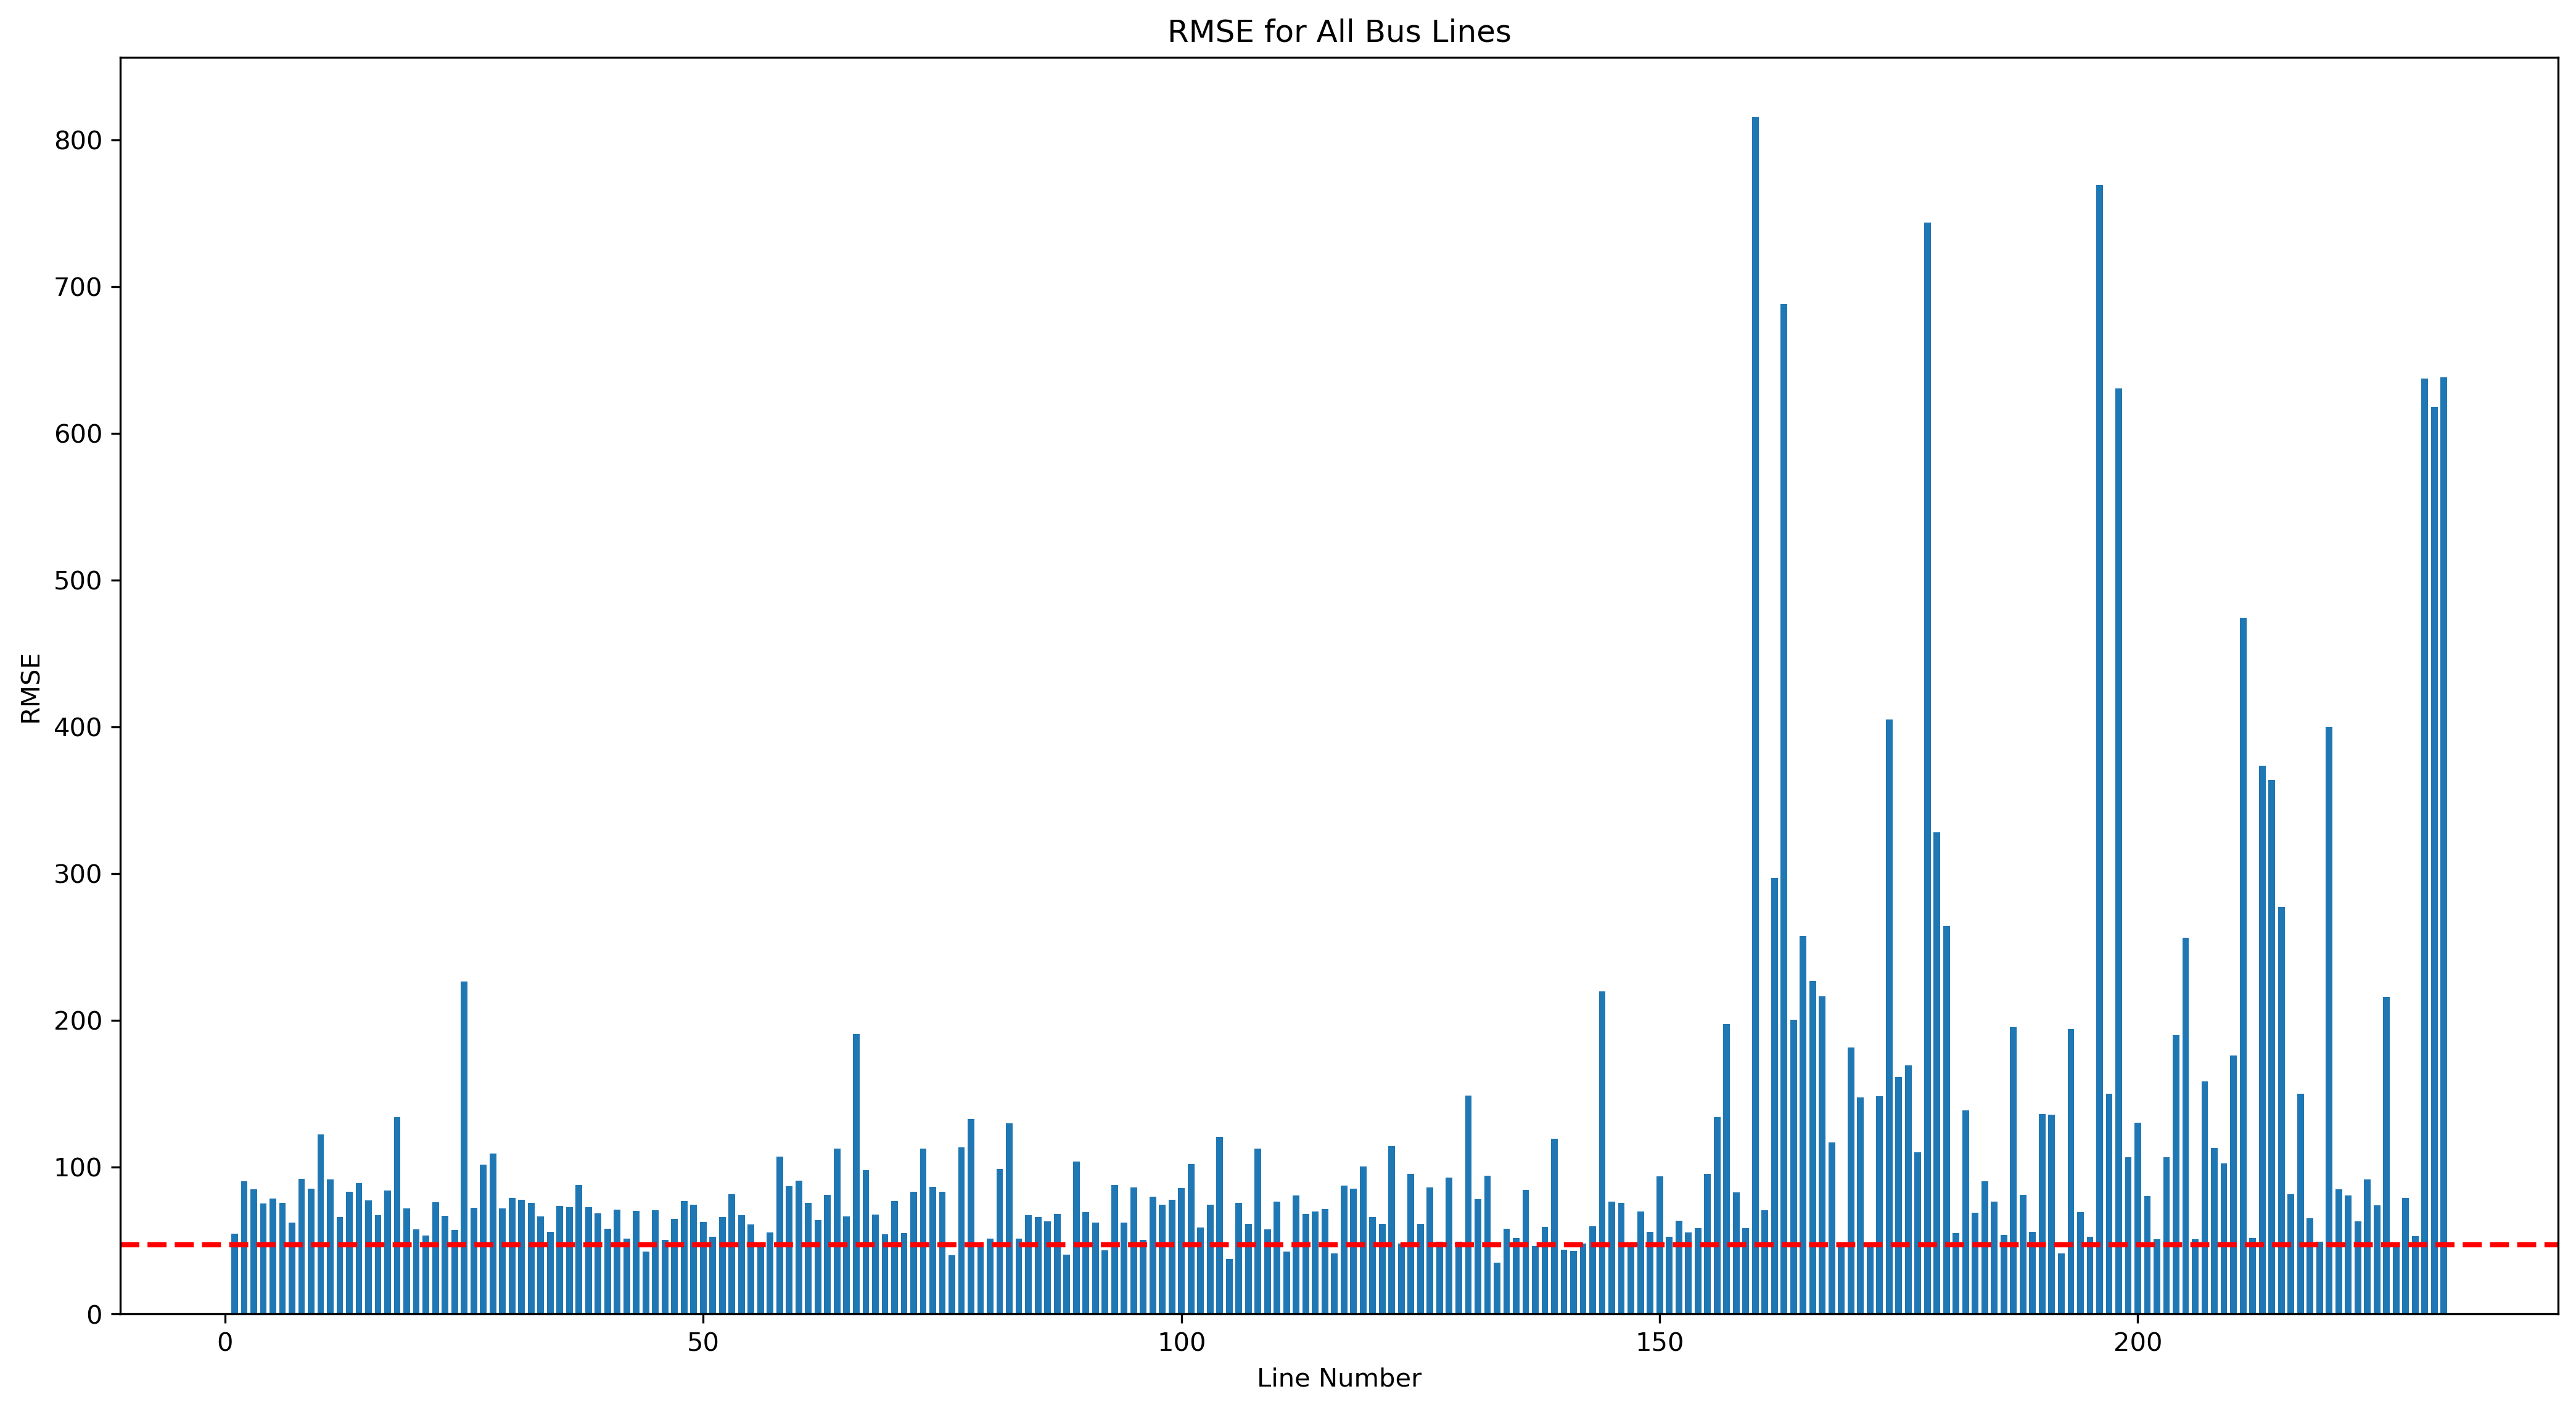

In [ ]:
fig, ax = plt.subplots(figsize=(17,9), dpi = 300)

# Plot bars
ax.axhline(df3['RMSE'].mean(), color='red', linewidth=2, linestyle='--', label='Avg') #threshold line (average line): delay= 487
bar1 = ax.bar(df3['Line'], df3['RMSE'], width=0.7)
plt.title('RMSE for All Bus Lines')
plt.xlabel('Line Number')
plt.ylabel('RMSE')

In [ ]:
df4=df_validation[4176:4408]
df4

,Line,RMSE
4176,1,tensor(23.7140)
4177,2,tensor(45.3668)
4178,3,tensor(38.5134)
4179,4,tensor(30.6580)
4180,5,tensor(25.8295)
...,...,...
4403,228,tensor(26.4376)
4404,229,tensor(19.9130)
4405,230,tensor(93.3476)
4406,231,tensor(84.1057)


Text(0, 0.5, 'RMSE')

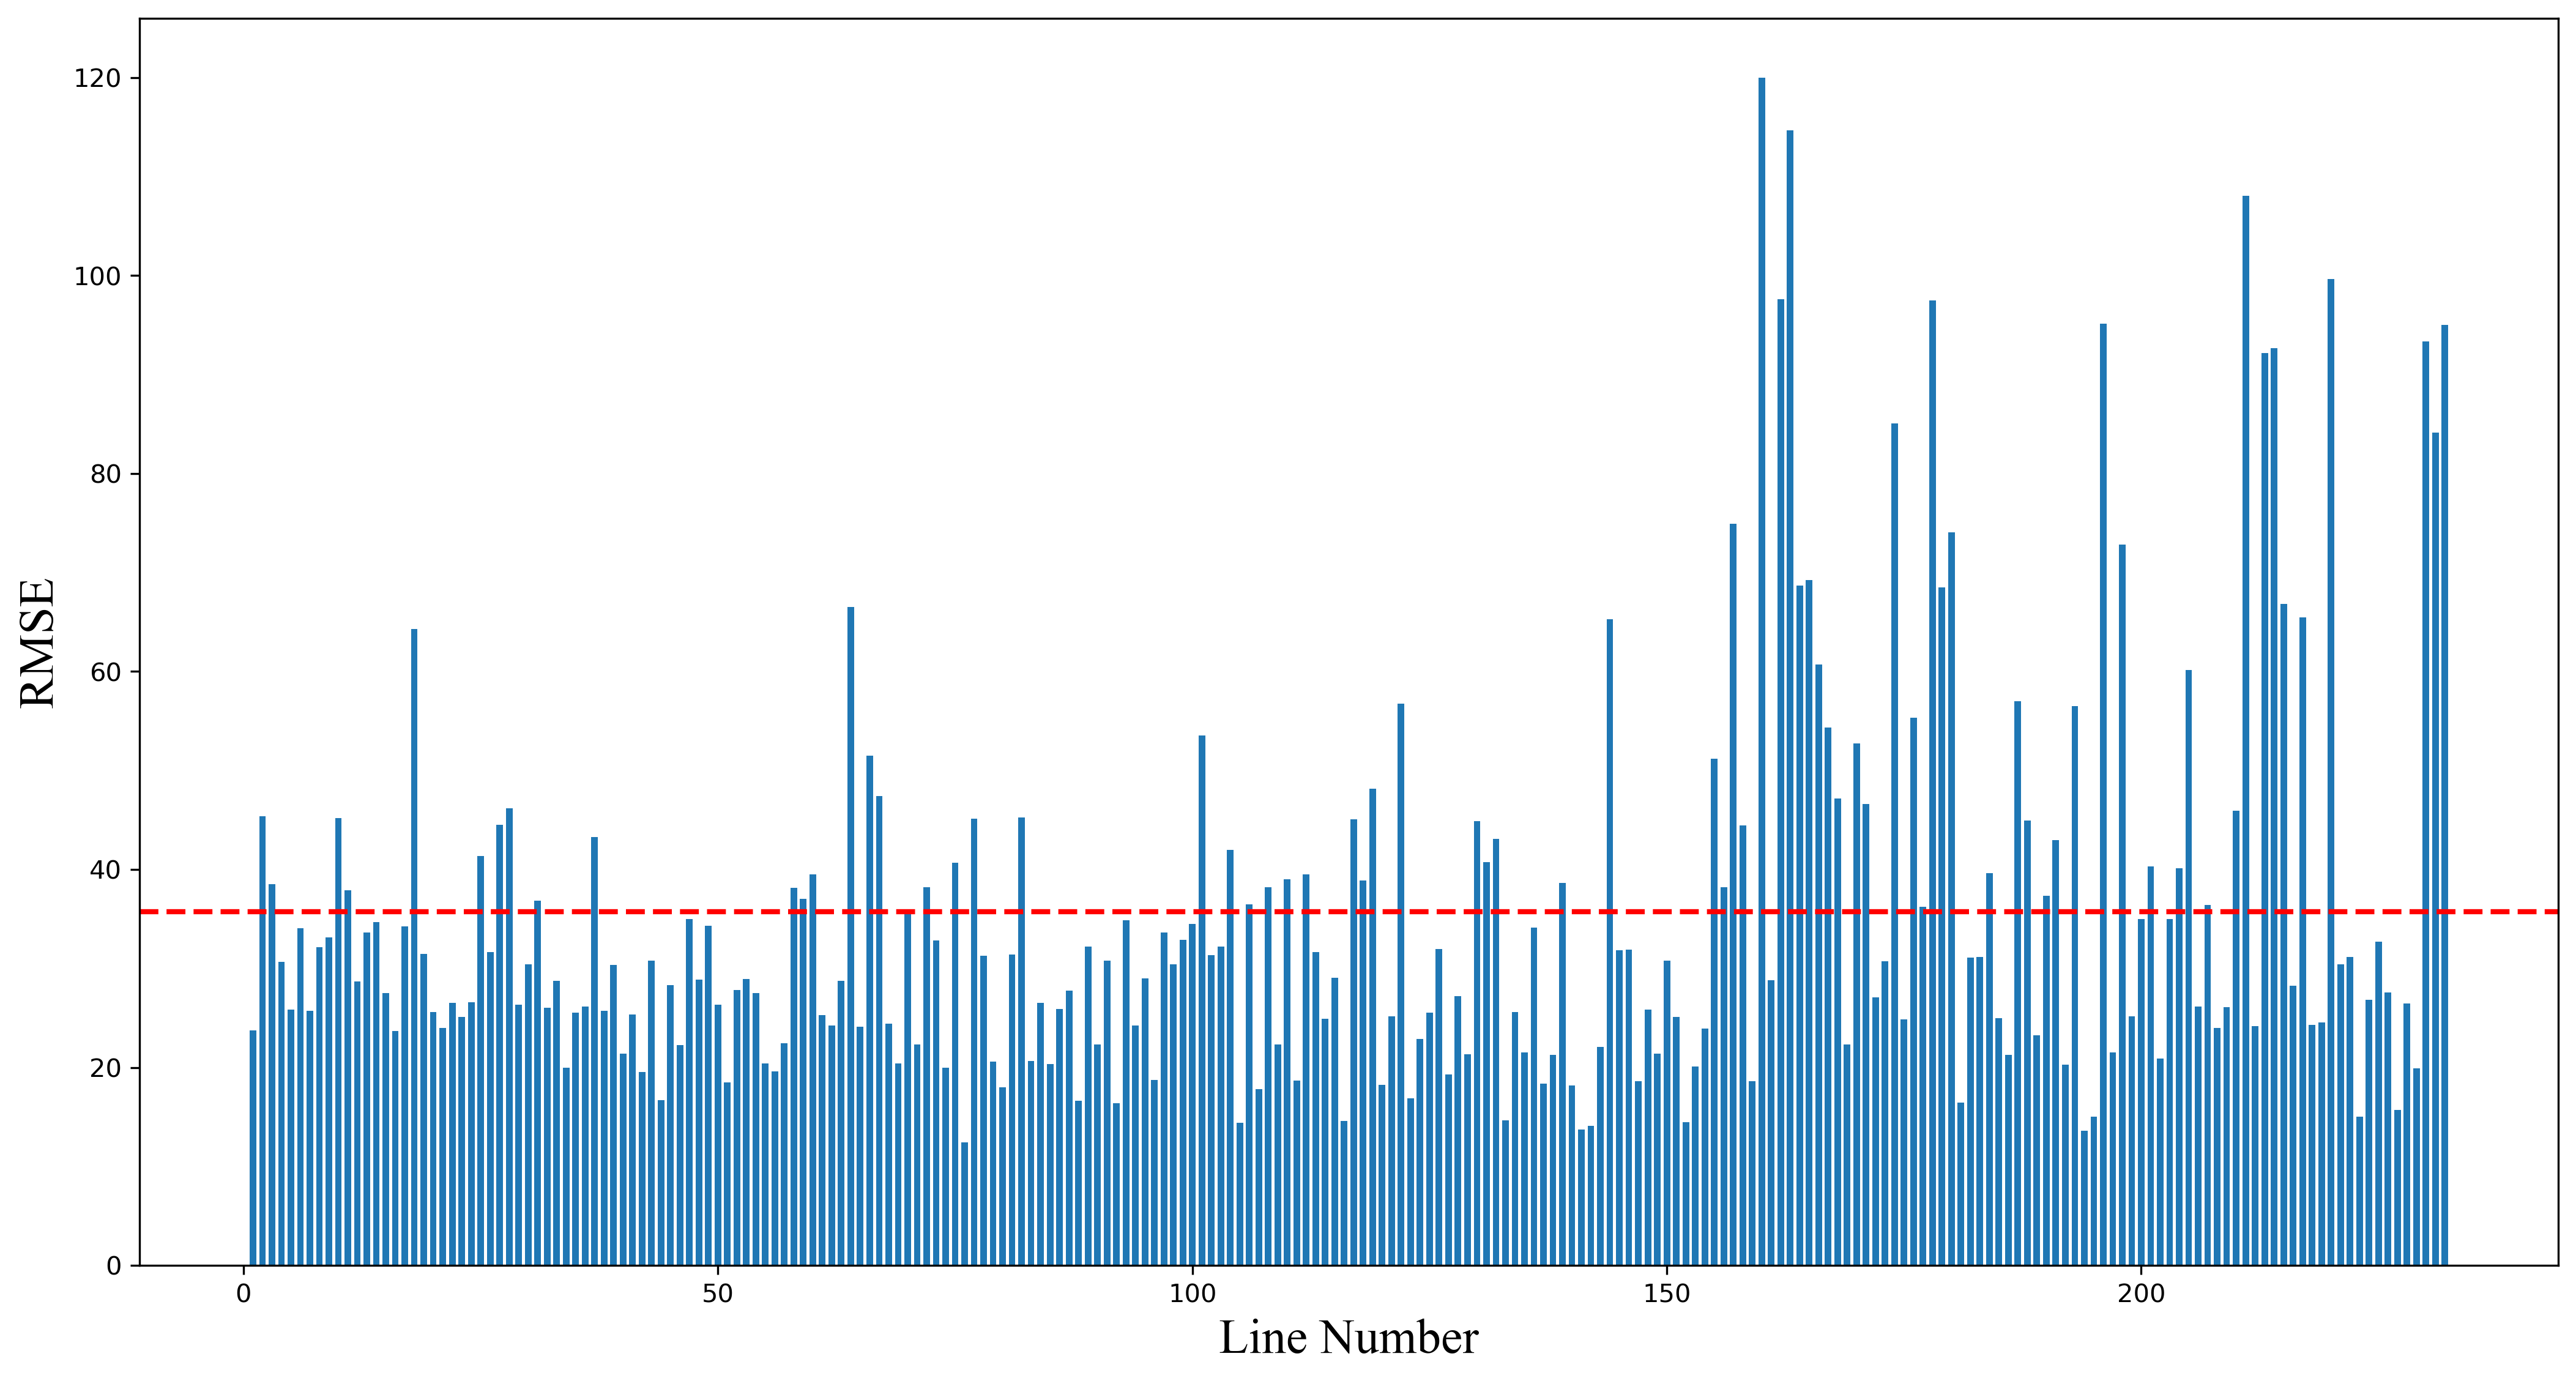

In [ ]:
fig, ax = plt.subplots(figsize=(17,9), dpi = 300)

# Plot bars
ax.axhline(df4['RMSE'].mean(), color='red', linewidth=2, linestyle='--', label='Avg') #threshold line (average line): delay= 487
bar1 = ax.bar(df4['Line'], df4['RMSE'], width=0.7)
fontsize = 19
#plt.title('RMSE for All Bus Lines' , fontdict={'fontsize': fontsize}, fontname='Times New Roman')
plt.xlabel('Line Number', fontdict={'fontsize': fontsize}, fontname='Times New Roman')
plt.ylabel('RMSE', fontdict={'fontsize': fontsize}, fontname='Times New Roman')

In [ ]:
df4['RMSE'].mean()

35.740520608836206

In [ ]:
df4['RMSE'].min()

tensor(12.4210)

In [ ]:
df4['RMSE'].max()

tensor(119.9936)

df5=df3[4170:4408]df5

In [ ]:
df5=df3[4170:4408]
df5


,Line,RMSE
4170,227,tensor(14.8000)
4171,228,tensor(25.8669)
4172,229,tensor(19.3171)
4173,230,tensor(85.8918)
4174,231,tensor(87.0097)
...,...,...
4403,228,tensor(26.4376)
4404,229,tensor(19.9130)
4405,230,tensor(93.3476)
4406,231,tensor(84.1057)
